In [3]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

```
# Esto tiene formato de código
```

#**Descargar archivos CSV**

Con este código se descargan los archivos directamente desde la plataforma Kaggle mediante la API

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia


#**Descomprimir los archivos**

In [5]:
!unzip udea*.zip > /dev/null

#**Cargar archivos como Dataframes**

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#**Mostrar los primeros datos del Dataframe**

In [8]:
train_df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


#**Mostrar número de registros vacios por columna**

In [9]:
k = train_df.isna().sum()
k

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773


#**Gráfica del número de estudiantes por rendimiento global**

Se ajustó la gráfica para visualizar de una mejor forma las diferencias entre cada rendimiento

(170000.0, 180000.0)

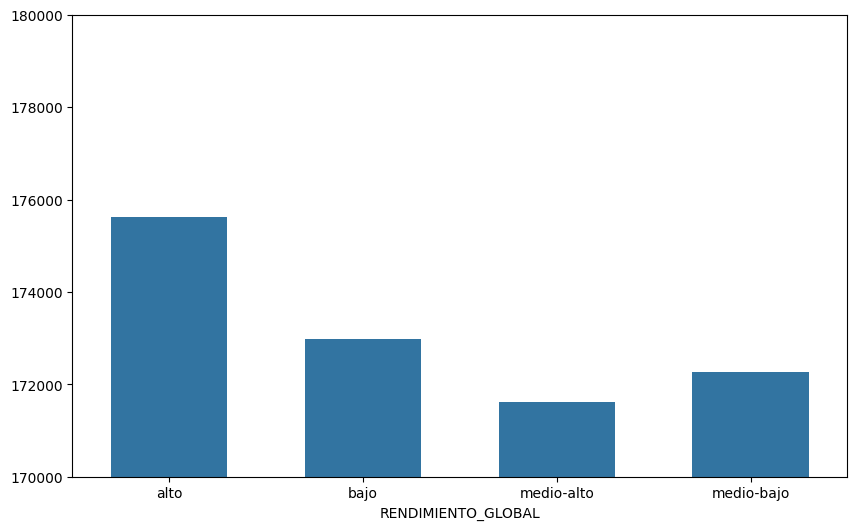

In [10]:
plt.figure(figsize=(10, 6))
rendimiento = train_df['RENDIMIENTO_GLOBAL'].value_counts().sort_index()
sns.barplot(x=rendimiento.index, y=rendimiento.values, width=0.6)
plt.ylim(170000, 180000)

#**Mostrar el tipo de dato de cada columna**

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

#**Mostrar las estadísticas globales de las columnas de tipo númerico**

De los no númericos muestra la moda, su frecuencia y el número de respuestas únicas

In [12]:
print(train_df.describe(include='all'))

                   ID        PERIODO ESTU_PRGM_ACADEMICO  \
count   692500.000000  692500.000000              692500   
unique            NaN            NaN                 948   
top               NaN            NaN             DERECHO   
freq              NaN            NaN               53244   
mean    494606.130576   20198.366679                 NaN   
std     285585.209455      10.535037                 NaN   
min          1.000000   20183.000000                 NaN   
25%     247324.750000   20195.000000                 NaN   
50%     494564.500000   20195.000000                 NaN   
75%     741782.500000   20203.000000                 NaN   
max     989286.000000   20213.000000                 NaN   

       ESTU_PRGM_DEPARTAMENTO          ESTU_VALORMATRICULAUNIVERSIDAD  \
count                  692500                                  686213   
unique                     31                                       8   
top                    BOGOTÁ  Entre 1 millón y menos de 2.5

#**Imprimir por cada columna sus nombres y sus variables únicas**

In [13]:
for col in train_df.columns:
    print("\n")
    print(f"{col}: {train_df[col].unique()}")



ID: [904256 645256 308367 ... 504185 986620 933374]


PERIODO: [20212 20203 20195 20183 20194 20213 20184 20202 20196]


ESTU_PRGM_ACADEMICO: ['ENFERMERIA' 'DERECHO' 'MERCADEO Y PUBLICIDAD'
 'ADMINISTRACION DE EMPRESAS' 'PSICOLOGIA' 'MEDICINA VETERINARIA'
 'INGENIERIA MECANICA' 'ADMINISTRACIÓN EN SALUD OCUPACIONAL'
 'INGENIERIA INDUSTRIAL' 'ADMINISTRACIÓN FINANCIERA' 'HOTELERIA Y TURISMO'
 'LICENCIATURA EN CIENCIAS SOCIALES' 'LICENCIATURA EN PEDAGOGIA INFANTIL'
 'COMUNICACION SOCIAL' 'CIENCIA POLITICA'
 'PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL'
 'MAESTRO EN MÚSICA' 'INGENIERIA MECATRONICA' 'TRABAJO SOCIAL'
 'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL' 'INGENIERIA CIVIL'
 'CONTADURIA PÚBLICA' 'ADMINISTRACION EN SALUD'
 'ADMINISTRACIÓN DE EMPRESAS' 'ESTADISTICA' 'LICENCIATURA EN BIOLOGIA'
 'INGENIERIA AGROINDUSTRIAL' 'ZOOTECNIA' 'COMUNICACION AUDIOVISUAL'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES'
 'COMUNICACION SOCIAL  - PERIODISMO' 'SE

#**Generar gráfica de barras de un conjunto de columnas para ver las frecuencias de sus variables únicas**

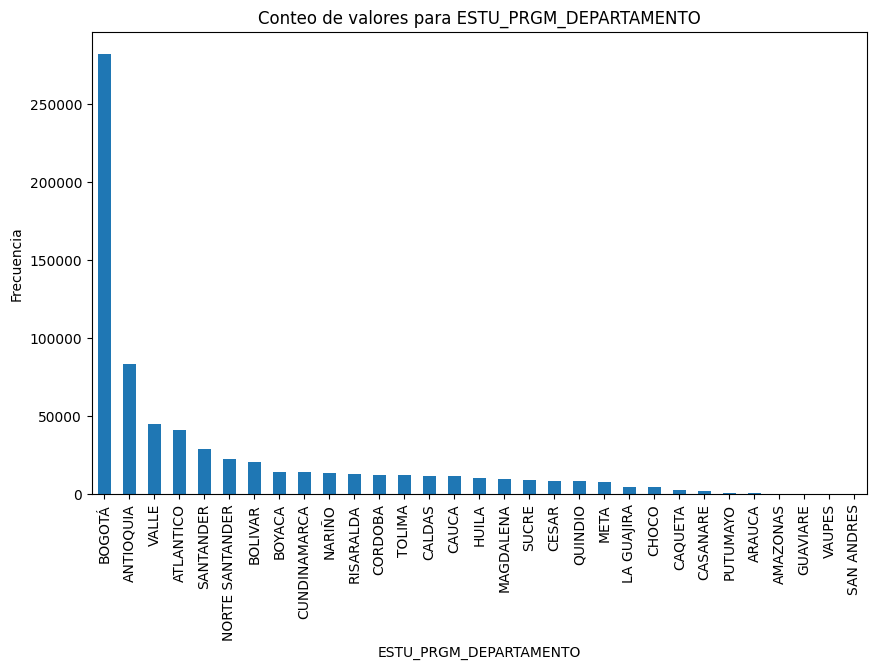

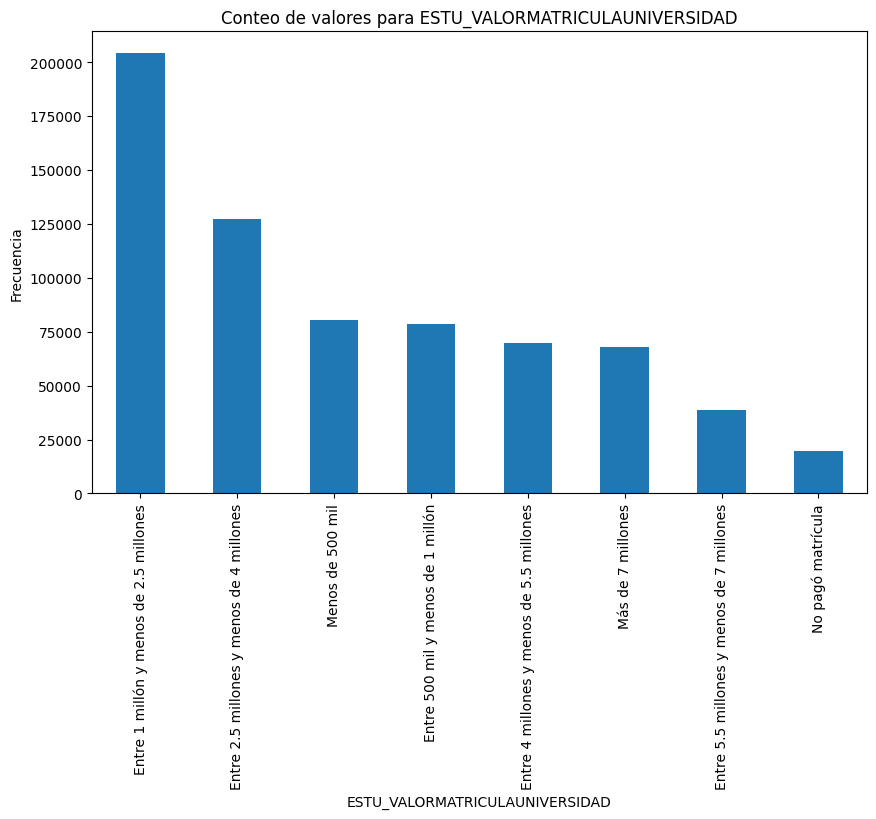

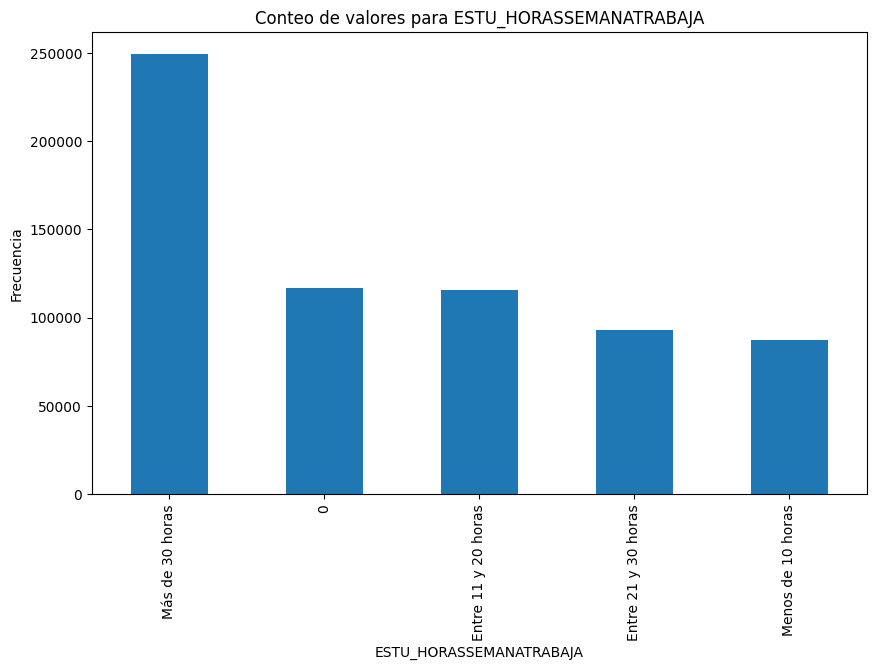

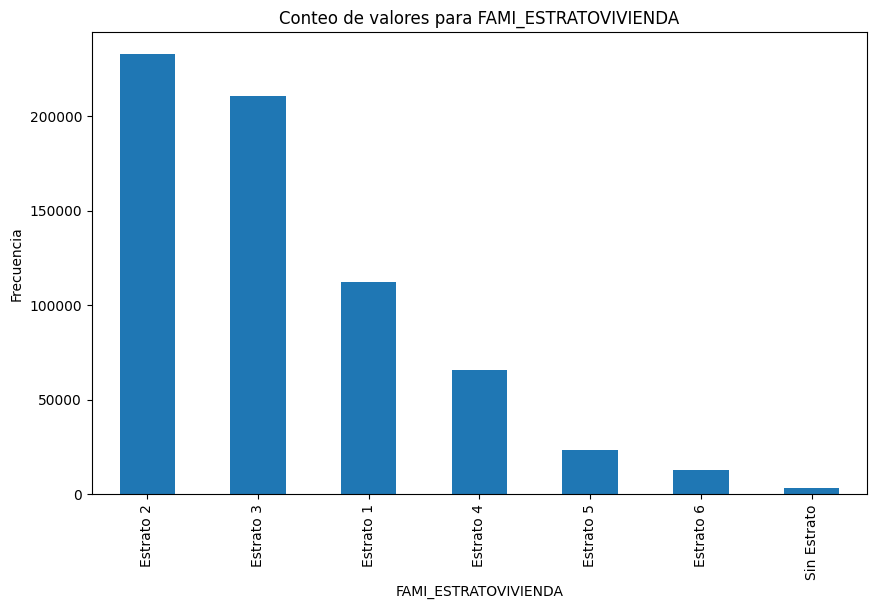

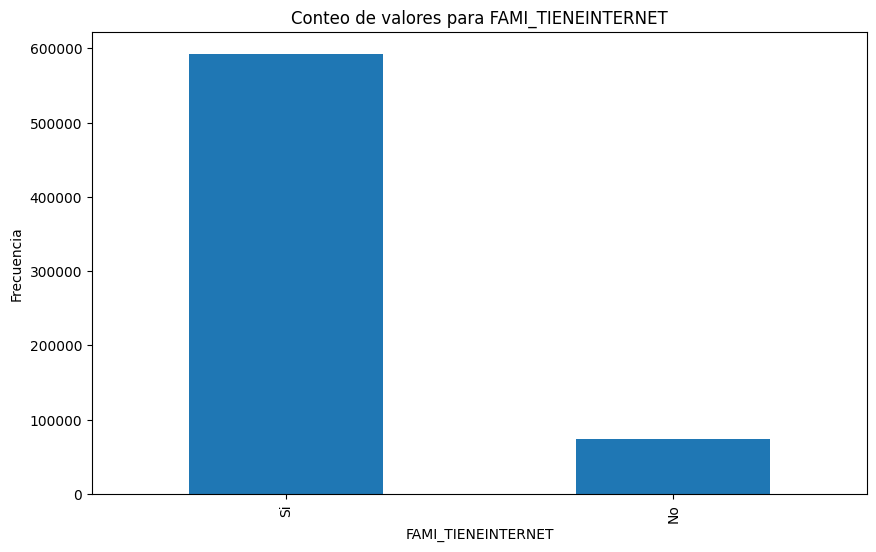

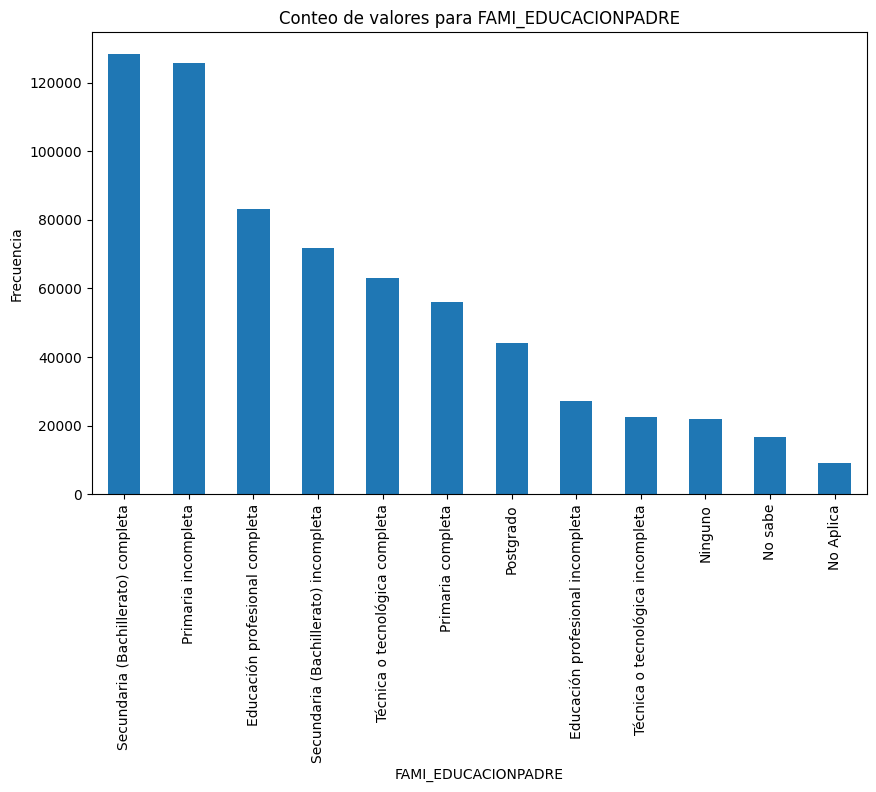

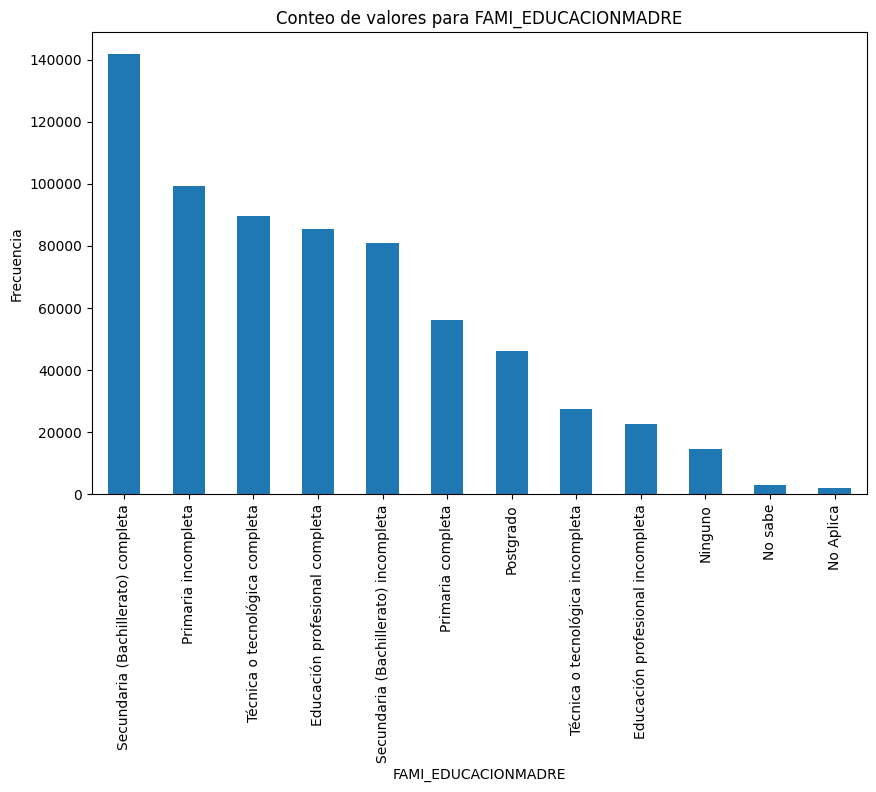

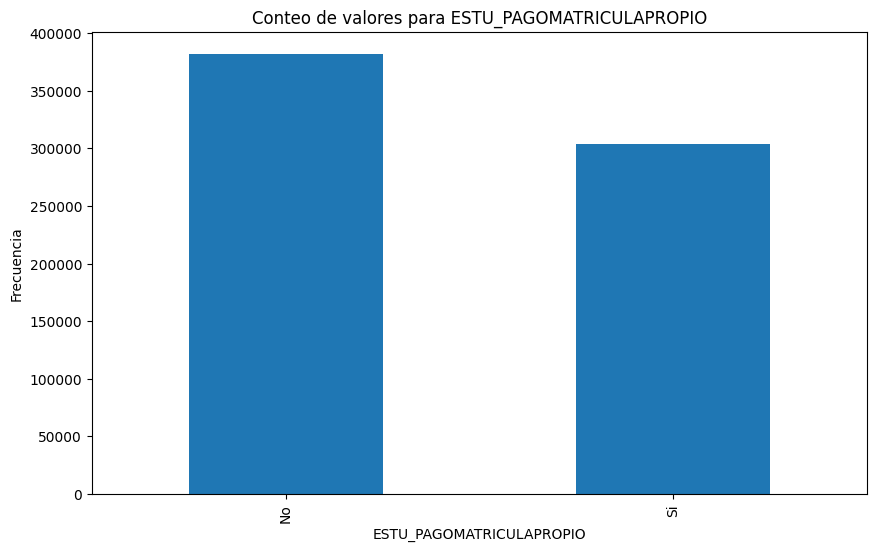

In [14]:
columnas = ['ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO']

for column in columnas:
    plt.figure(figsize=(10, 6))
    print("\n")
    train_df[column].value_counts().plot(kind='bar')
    plt.title(f'Conteo de valores para {column}')
    plt.ylabel('Frecuencia')
    plt.xlabel(column)
    plt.show()


# **Mostrar gráficas que relacionan dos columnas**

## **Estrato vs Rendimiento Global**

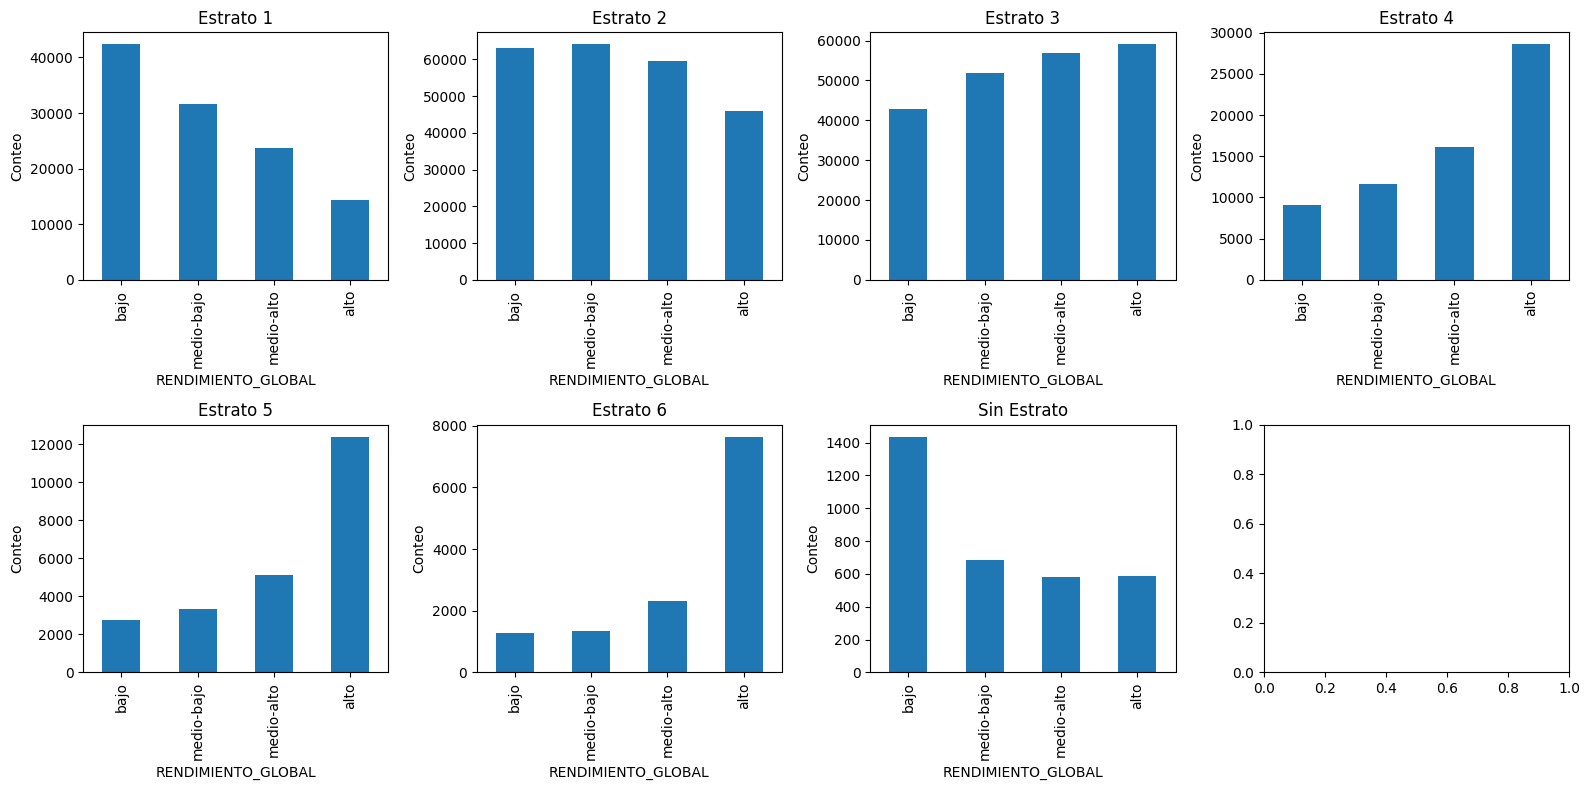

In [15]:
c = sorted(train_df.FAMI_ESTRATOVIVIENDA.value_counts().index)
n_cols = 4
n_rows = (len(c) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()
# Iterar sobre las categorías y sus respectivos ejes
for i, ci in enumerate(c):
    ax = axes[i]
    zc = train_df[train_df.FAMI_ESTRATOVIVIENDA == ci]
    counts = zc.RENDIMIENTO_GLOBAL.value_counts()
    counts = counts.reindex(['bajo', 'medio-bajo', 'medio-alto', 'alto'], fill_value=0)
    counts.plot(kind='bar', ax=ax)
    ax.set_title(f'{ci}')
    ax.set_ylabel('Conteo')

plt.tight_layout()
plt.show()


## **Horas que Trabaja por Semana vs Rendimiento Global**


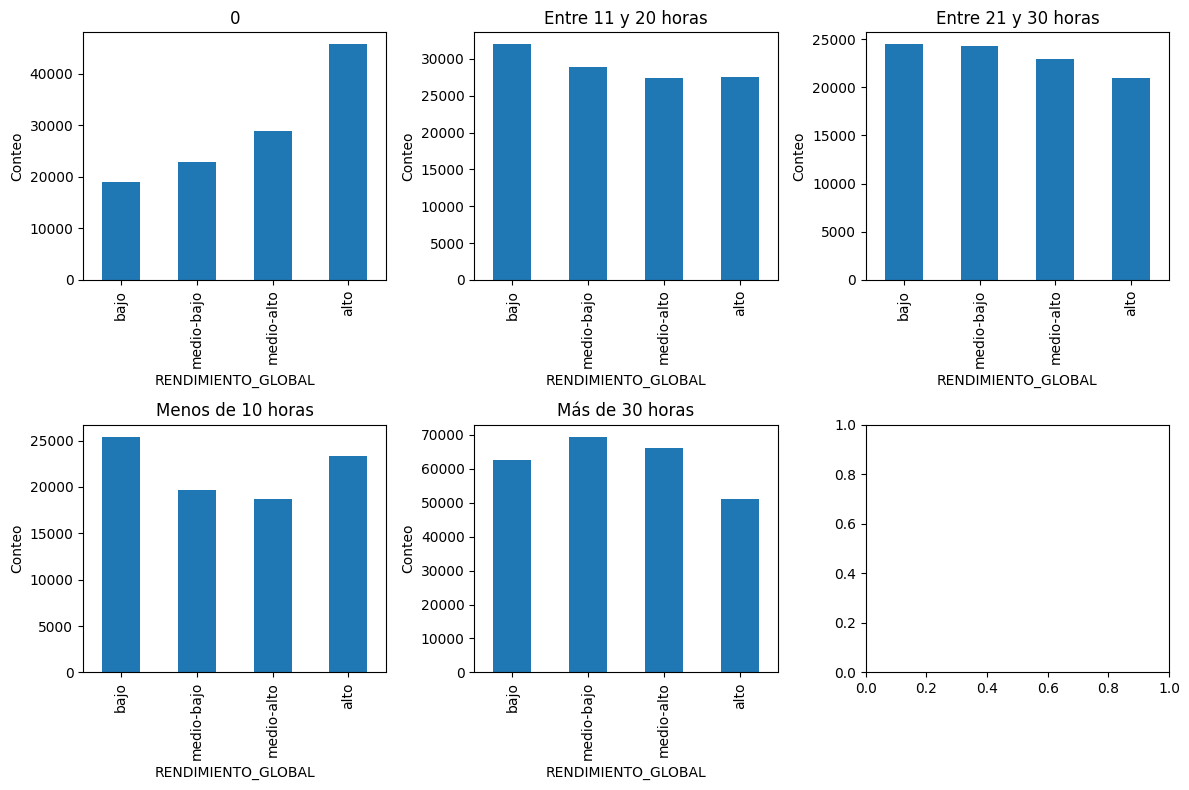

In [16]:
c = sorted(train_df.ESTU_HORASSEMANATRABAJA.value_counts().index)
n_cols = 3
n_rows = (len(c) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()
# Iterar sobre las categorías y sus respectivos ejes
for i, ci in enumerate(c):
    ax = axes[i]
    zc = train_df[train_df.ESTU_HORASSEMANATRABAJA == ci]
    counts = zc.RENDIMIENTO_GLOBAL.value_counts()
    counts = counts.reindex(['bajo', 'medio-bajo', 'medio-alto', 'alto'], fill_value=0)
    counts.plot(kind='bar', ax=ax)
    ax.set_title(f'{ci}')
    ax.set_ylabel('Conteo')

plt.tight_layout()
plt.show()

```
# Esto tiene formato de código
```

## **Paga su Propia Matricula vs Rendimiento Global**

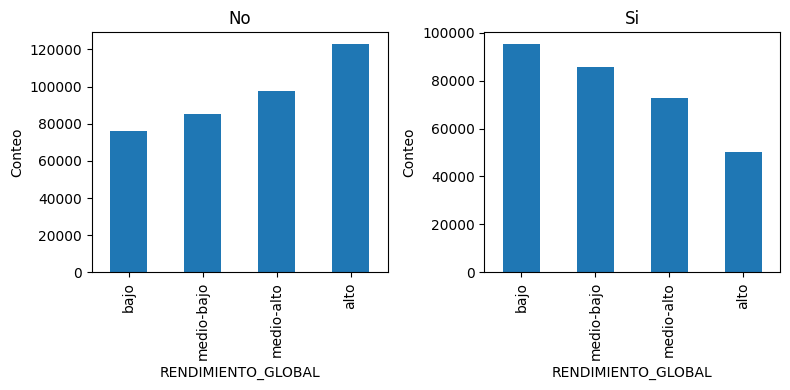

In [17]:
c = sorted(train_df.ESTU_PAGOMATRICULAPROPIO.value_counts().index)
n_cols = 2
n_rows = (len(c) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()
# Iterar sobre las categorías y sus respectivos ejes
for i, ci in enumerate(c):
    ax = axes[i]
    zc = train_df[train_df.ESTU_PAGOMATRICULAPROPIO == ci]
    counts = zc.RENDIMIENTO_GLOBAL.value_counts()
    counts = counts.reindex(['bajo', 'medio-bajo', 'medio-alto', 'alto'], fill_value=0)
    counts.plot(kind='bar', ax=ax)
    ax.set_title(f'{ci}')
    ax.set_ylabel('Conteo')

plt.tight_layout()
plt.show()

## **Educación del Padre vs Rendimiento Global**

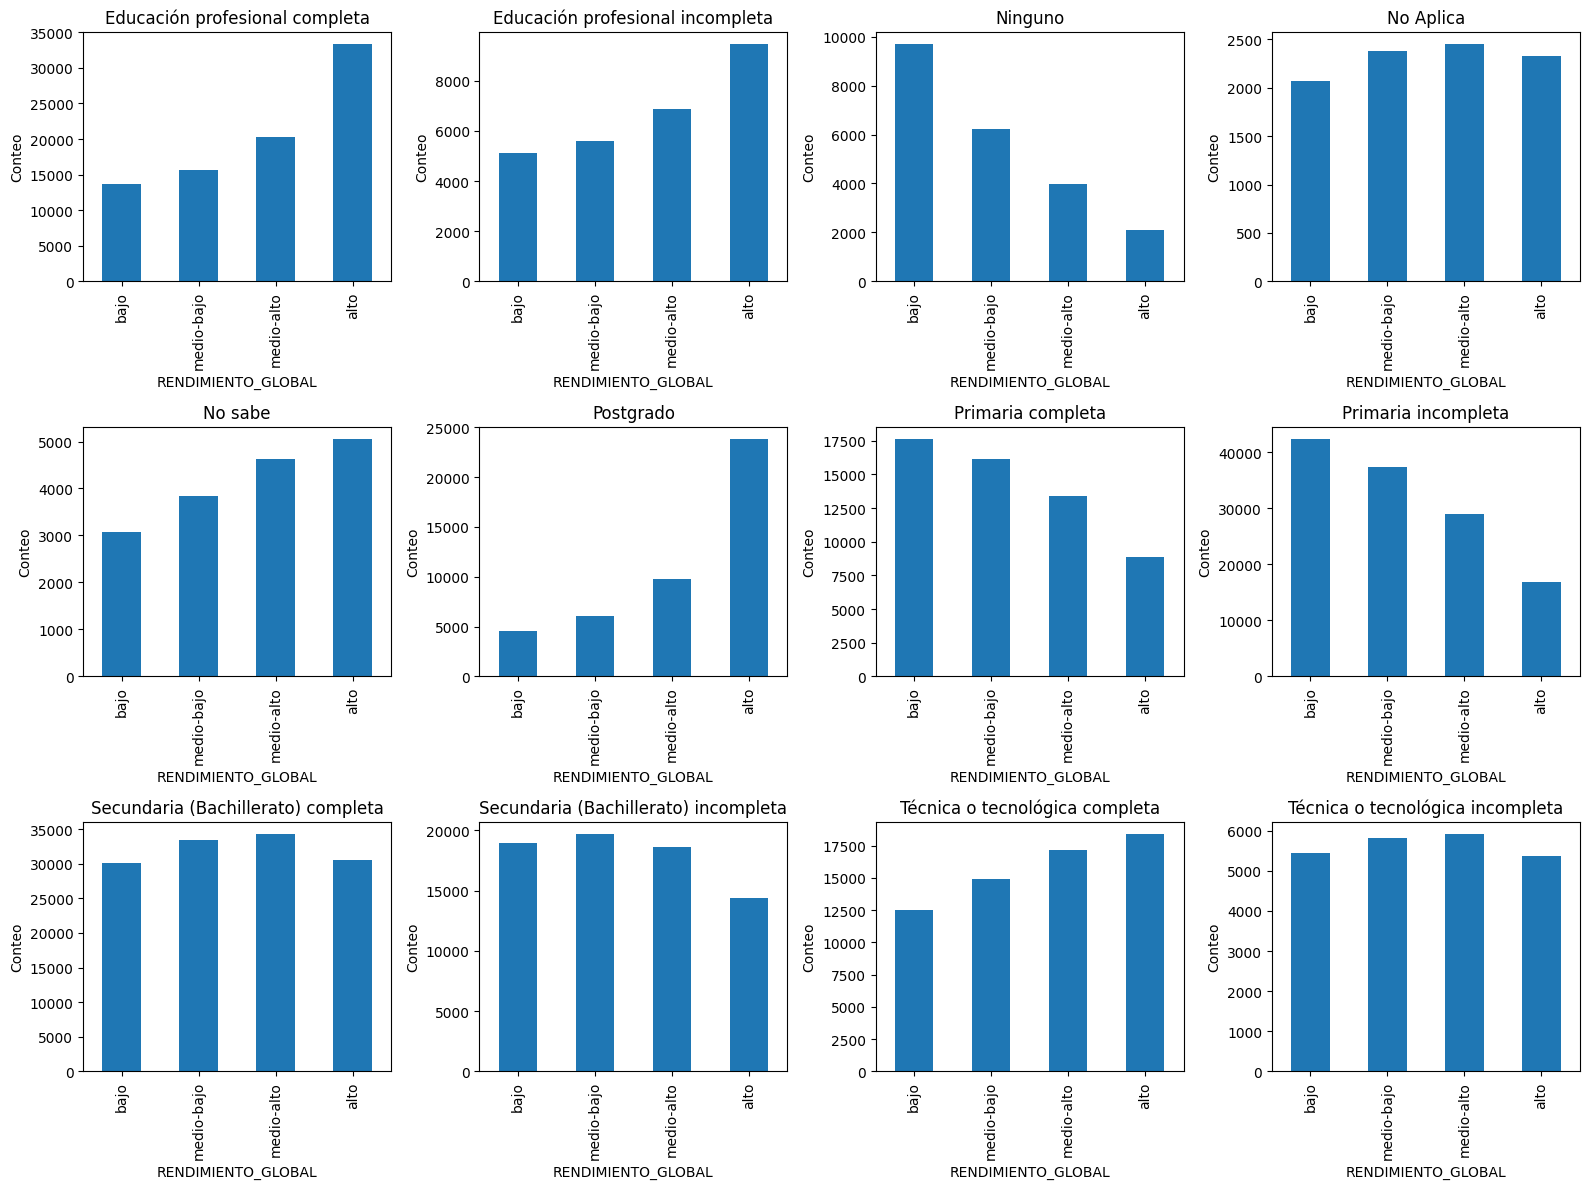

In [18]:
c = sorted(train_df.FAMI_EDUCACIONPADRE.value_counts().index)
n_cols = 4
n_rows = (len(c) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()
# Iterar sobre las categorías y sus respectivos ejes
for i, ci in enumerate(c):
    ax = axes[i]
    zc = train_df[train_df.FAMI_EDUCACIONPADRE == ci]
    counts = zc.RENDIMIENTO_GLOBAL.value_counts()
    counts = counts.reindex(['bajo', 'medio-bajo', 'medio-alto', 'alto'], fill_value=0)
    counts.plot(kind='bar', ax=ax)
    ax.set_title(f'{ci}')
    ax.set_ylabel('Conteo')

plt.tight_layout()
plt.show()

## **Tiene Intenet en su Hogar vs Rendimiento Global**

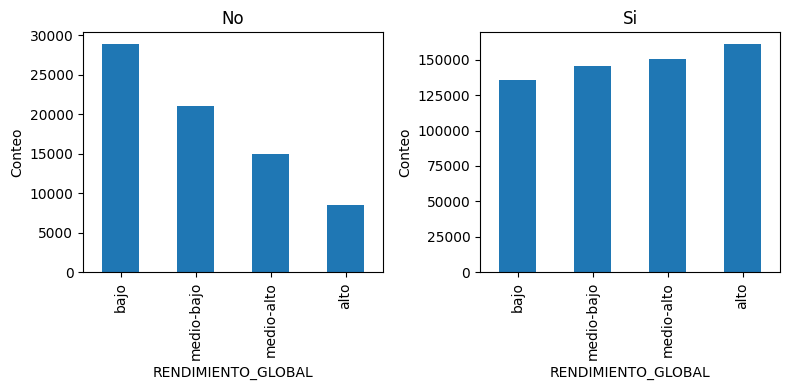

In [19]:
c = sorted(train_df.FAMI_TIENEINTERNET.value_counts().index)
n_cols = 2
n_rows = (len(c) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()
# Iterar sobre las categorías y sus respectivos ejes
for i, ci in enumerate(c):
    ax = axes[i]
    zc = train_df[train_df.FAMI_TIENEINTERNET == ci]
    counts = zc.RENDIMIENTO_GLOBAL.value_counts()
    counts = counts.reindex(['bajo', 'medio-bajo', 'medio-alto', 'alto'], fill_value=0)
    counts.plot(kind='bar', ax=ax)
    ax.set_title(f'{ci}')
    ax.set_ylabel('Conteo')

plt.tight_layout()
plt.show()